In [1]:
import json
import re
import numpy as np
import matplotlib.pyplot as plt

In [27]:
#Get health and personal care products metadata
!wget https://mcauleylab.ucsd.edu/public_datasets/data/amazon_2023/raw/meta_categories/meta_Health_and_Personal_Care.jsonl.gz
!gunzip -f meta_Health_and_Personal_Care.jsonl.gz

#Get health and personl care products user reviews
!wget https://mcauleylab.ucsd.edu/public_datasets/data/amazon_2023/raw/review_categories/Health_and_Personal_Care.jsonl.gz
!gunzip -f Health_and_Personal_Care.jsonl.gz

file_products = "./meta_Health_and_Personal_Care.jsonl"

file_reviews = "./Health_and_Personal_Care.jsonl"

products = []

reviews = []

with open(file_products, 'r') as fp:
    for line in fp:
        products.append(json.loads(line.strip()))

with open(file_reviews, 'r') as fp:
    for line in fp:
        reviews.append(json.loads(line.strip()))

--2025-02-01 19:26:06--  https://mcauleylab.ucsd.edu/public_datasets/data/amazon_2023/raw/meta_categories/meta_Health_and_Personal_Care.jsonl.gz
Resolving mcauleylab.ucsd.edu (mcauleylab.ucsd.edu)... 169.228.63.88
Connecting to mcauleylab.ucsd.edu (mcauleylab.ucsd.edu)|169.228.63.88|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 23636692 (23M) [application/x-gzip]
Saving to: ‘meta_Health_and_Personal_Care.jsonl.gz’

meta_Health_and_Per 100%[===================>]  22.54M  25.0MB/s    in 0.9s    

2025-02-01 19:26:07 (25.0 MB/s) - ‘meta_Health_and_Personal_Care.jsonl.gz’ saved [23636692/23636692]

--2025-02-01 19:26:08--  https://mcauleylab.ucsd.edu/public_datasets/data/amazon_2023/raw/review_categories/Health_and_Personal_Care.jsonl.gz
Resolving mcauleylab.ucsd.edu (mcauleylab.ucsd.edu)... 169.228.63.88
Connecting to mcauleylab.ucsd.edu (mcauleylab.ucsd.edu)|169.228.63.88|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 70185444 (67M) 

In [28]:
# Subset all of the info to only include relevant fields
# Parent_asin will be used to match reviews and products

relevant_fields_p = ['title', 'rating_number', 'features', 'description', 'details', 'parent_asin']
relevant_fields_r = ['title', 'text', 'helpful_vote', 'user_id', 'parent_asin']
products = [{field:product[field] for field in relevant_fields_p} for product in products]
reviews = [{field:review[field] for field in relevant_fields_r} for review in reviews]

# Combine features and description and remove unusual characters such as emojis.
for product in products:
    product['combined_description'] = re.sub(r'[^a-zA-Z0-9\s]', '', ' '.join(product['description'] + product['features'])).strip()
for review in reviews:
    review['text'] = re.sub(r'[^a-zA-Z0-9\s]', '', review['text']).strip()

In [ ]:
# Get the number of ratings for each product
num_ratings = []

for product in products:
    num_ratings.append(product['rating_number'])

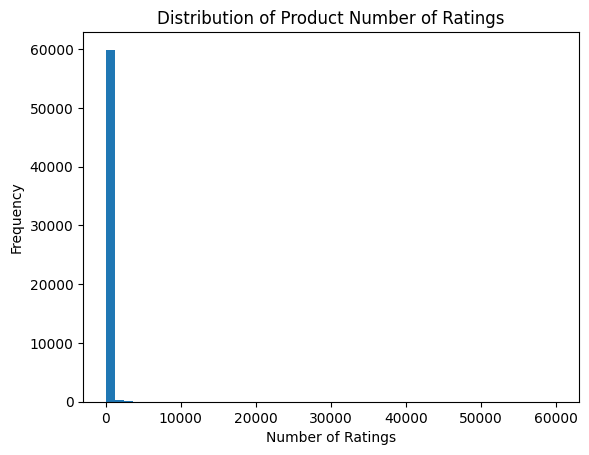

min is: 1
25th percentile is: 3.0
median is:10.0
75th percentile is: 32.0
max is: 60033


In [54]:
#I think the distribution is so skewed that the histogram is not that helpful
plt.hist(num_ratings, bins=50)
plt.title('Distribution of Product Number of Ratings')
plt.xlabel('Number of Ratings')
plt.ylabel('Frequency')
plt.show()

print(f'min is: {np.min(num_ratings)}')
print(f'25th percentile is: {np.percentile(num_ratings, 25)}')
print(f'median is:{np.percentile(num_ratings, 50)}')
print(f'75th percentile is: {np.percentile(num_ratings, 75)}')
print(f'max is: {np.max(num_ratings)}')

In [57]:
ratings_threshold = np.percentile(num_ratings, 75)
filtered_products = [product for product in products if product['rating_number'] > ratings_threshold]

print(f"There are now {len(filtered_products)} remaining products.")

There are now 14907 remaining products.


In [58]:
lengths = []
has_features = 0
has_description = 0

for product in filtered_products:
    lengths.append(len(product['combined_description']))
    if len(product['features']) > 0:
        has_features += 1

    if len(product['description']) > 0:
        has_description += 1

lengths = np.array(lengths)

In [59]:
print(f"Proportion of products with features: {has_features / len(filtered_products) * 100}")
print(f"Proportion of products with descriptions: {has_description / len(filtered_products) * 100}")

Proportion of products with features: 31.2940229422419
Proportion of products with descriptions: 29.536459381498624


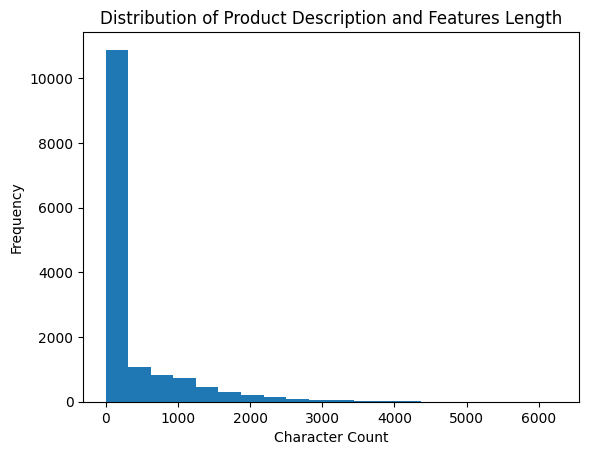

In [60]:
plt.hist(lengths, bins=20)
plt.title('Distribution of Product Description and Features Length')
plt.xlabel('Character Count')
plt.ylabel('Frequency')
plt.show()

In [61]:
description_threshold = 50

final_products = [product for product in filtered_products if len(product['combined_description']) > description_threshold]

print(f"There are now {len(final_products)} remaining products.")

There are now 5476 remaining products.
